## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
# plt.style.use("ggplot")
sns.set_style("darkgrid")

## Load the Aggregated data

In [2]:
merged_df = pd.read_csv("../../clean_data/FinalData_for_Models.csv", index_col=0)

In [3]:
merged_df.head()

,num_pickups,num_passengers,missing_dt,temp,temp_min,temp_max,humidity,wind_speed,weather_main,weather_description,Passengers,Month,Hour,Day,holiday
2014-01-01 00:00:00-05:00,107.0,210.0,False,269.27,267.59,270.93,80.0,3.0,clear,sky is clear,108.0,1,0,2,True
2014-01-01 01:00:00-05:00,34.0,45.0,False,268.90,267.04,270.93,80.0,2.0,clear,sky is clear,0.0,1,1,2,True
2014-01-01 02:00:00-05:00,34.0,70.0,False,268.48,266.48,270.37,57.0,3.0,clear,sky is clear,0.0,1,2,2,True
2014-01-01 03:00:00-05:00,12.0,18.0,False,268.33,265.93,270.37,80.0,3.0,clear,sky is clear,0.0,1,3,2,True
2014-01-01 04:00:00-05:00,25.0,37.0,False,268.10,265.37,270.37,80.0,3.0,clear,sky is clear,0.0,1,4,2,True


In [8]:
merged_df.index = pd.DatetimeIndex(merged_df.index).tz_localize("UTC").tz_convert("EST")

In [9]:
merged_df.head()

,num_pickups,num_passengers,missing_dt,temp,temp_min,temp_max,humidity,wind_speed,weather_main,weather_description,Passengers,Month,Hour,Day,holiday
2014-01-01 00:00:00-05:00,107.0,210.0,False,269.27,267.59,270.93,80.0,3.0,clear,sky is clear,108.0,1,0,2,True
2014-01-01 01:00:00-05:00,34.0,45.0,False,268.90,267.04,270.93,80.0,2.0,clear,sky is clear,0.0,1,1,2,True
2014-01-01 02:00:00-05:00,34.0,70.0,False,268.48,266.48,270.37,57.0,3.0,clear,sky is clear,0.0,1,2,2,True
2014-01-01 03:00:00-05:00,12.0,18.0,False,268.33,265.93,270.37,80.0,3.0,clear,sky is clear,0.0,1,3,2,True
2014-01-01 04:00:00-05:00,25.0,37.0,False,268.10,265.37,270.37,80.0,3.0,clear,sky is clear,0.0,1,4,2,True


In [10]:
df = merged_df.groupby(["weather_main", "weather_description"]).count()

In [11]:
df

num_pickups  num_passengers  missing_dt  \
weather_main weather_description                                               
clear        sky is clear                   5925            5866        7349   
clouds       broken clouds                  3869            3860        4380   
             few clouds                     1776            1769        2158   
             overcast clouds                2763            2744        3060   
             scattered clouds               2770            2764        3225   
fog          broken clouds                     5               5           5   
             few clouds                        5               5           5   
             fog                            2607            2577        3049   
             overcast clouds                   4               4           4   
             scattered clouds                  4               4           4   
             sky is clear                      8               8           8   
rain         freezing rain                    10              10          10   
             heavy intensity rain            335             334         422   
             light rain                     3972            3946        4628   
             moderate rain                  1018            1007        1231   
snow         heavy snow                       60              60          69   
             light snow                      453             449         547   
             snow                             92              89         103   
thunderstorm proximity thunderstorm          138             135         165   
             thunderstorm                    192             191         225   

                                     temp  temp_min  temp_max  humidity  \
weather_main weather_description                                          
clear        sky is clear            7349      7349      7349      7349   
clouds       broken clouds           4380      4380      4380      4380   
             few clouds              2158      2158      2158      2158   
             overcast clouds         3060      3060      3060      3060   
             scattered clouds        3225      3225      3225      3225   
fog          broken clouds              5         5         5         5   
             few clouds                 5         5         5         5   
             fog                     3049      3049      3049      3049   
             overcast clouds            4         4         4         4   
             scattered clouds           4         4         4         4   
             sky is clear               8         8         8         8   
rain         freezing rain             10        10        10        10   
             heavy intensity rain     422       422       422       422   
             light rain              4628      4628      4628      4628   
             moderate rain           1231      1231      1231      1231   
snow         heavy snow                69        69        69        69   
             light snow               547       547       547       547   
             snow                     103       103       103       103   
thunderstorm proximity thunderstorm   165       165       165       165   
             thunderstorm             225       225       225       225   

                                     wind_speed  Passengers  Month  Hour  \
weather_main weather_description                                           
clear        sky is clear                  7349        7347   7349  7349   
clouds       broken clouds                 4380        4380   4380  4380   
             few clouds                    2158        2158   2158  2158   
             overcast clouds               3060        3060   3060  3060   
             scattered clouds              3225        3225   3225  3225   
fog          broken clouds                    5           5      5     5   
             few 

In [46]:
monthly_df = monthly_df.reset_index()

In [47]:
check = monthly_df.loc[monthly_df["weather_main"] == "Rain", :]

In [48]:
check

,weather_main,weather_description,pickup_count,Passengers
13,Rain,freezing rain,380.500000,1704.000000
14,Rain,heavy intensity rain,348.706897,1148.062500
15,Rain,light intensity shower rain,1.000000,NaN
16,Rain,light rain,344.977679,1303.288184
17,Rain,moderate rain,320.250000,1261.437500
18,Rain,shower rain,94.000000,600.000000


In [49]:
check = check.sort_values(by="pickup_count")

In [50]:
check = check.reset_index()

In [51]:
check

,index,weather_main,weather_description,pickup_count,Passengers
0,15,Rain,light intensity shower rain,1.000000,NaN
1,18,Rain,shower rain,94.000000,600.000000
2,17,Rain,moderate rain,320.250000,1261.437500
3,16,Rain,light rain,344.977679,1303.288184
4,14,Rain,heavy intensity rain,348.706897,1148.062500
5,13,Rain,freezing rain,380.500000,1704.000000


In [52]:
check["weather_description"]

0    light intensity shower rain
1                    shower rain
2                  moderate rain
3                     light rain
4           heavy intensity rain
5                  freezing rain
Name: weather_description, dtype: object

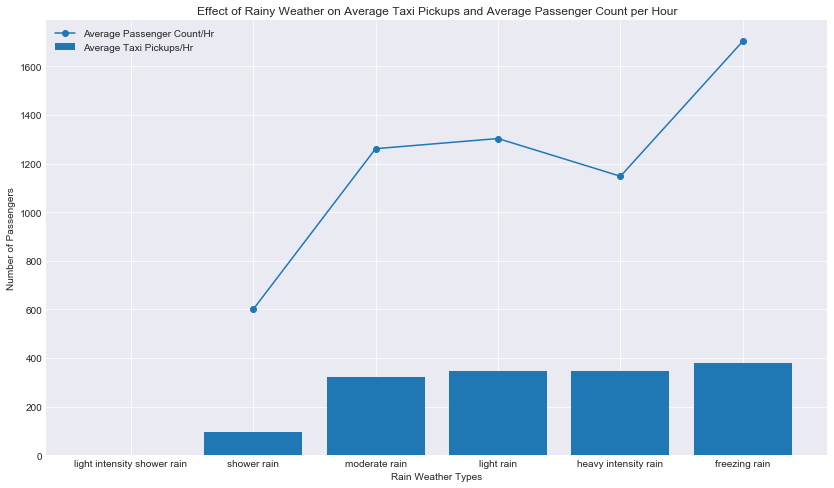

In [53]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(111)
ax1.bar(np.arange(check["weather_description"].sort_values().shape[0]), check["pickup_count"], label="Average Taxi Pickups/Hr")
# ax2 = ax1.twinx()
ax1.plot(check["Passengers"], marker="o", label="Average Passenger Count/Hr")

plt.xticks(check.index, check["weather_description"])
plt.xlabel("Rain Weather Types")
plt.ylabel("Number of Passengers")
plt.title("Effect of Rainy Weather on Average Taxi Pickups and Average Passenger Count per Hour")
plt.legend()
plt.show()

# sns.barplot(x = "weather_description", y = "pickup_count", data=check)


In [54]:
check1 = monthly_df.loc[monthly_df["weather_main"] == "Snow", :]

In [55]:
check1 = check1.sort_values(by="pickup_count")

In [56]:
check1 = check1.reset_index()

In [57]:
check1

,index,weather_main,weather_description,pickup_count,Passengers
0,19,Snow,heavy snow,115.206897,854.200000
1,22,Snow,snow,188.142857,789.526316
2,20,Snow,light rain and snow,213.666667,1055.333333
3,21,Snow,light snow,285.094340,1155.682353


In [58]:
check1


,index,weather_main,weather_description,pickup_count,Passengers
0,19,Snow,heavy snow,115.206897,854.200000
1,22,Snow,snow,188.142857,789.526316
2,20,Snow,light rain and snow,213.666667,1055.333333
3,21,Snow,light snow,285.094340,1155.682353


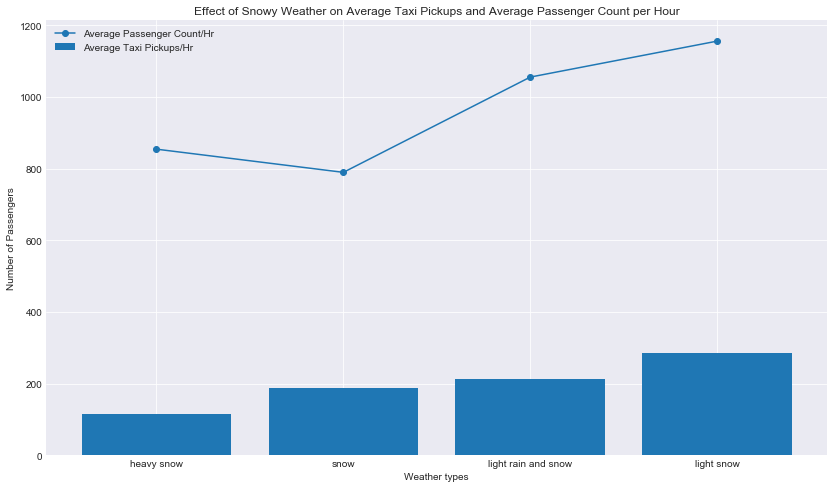

In [59]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(111)
ax1.bar(np.arange(check1["weather_description"].sort_values().shape[0]), check1["pickup_count"], label="Average Taxi Pickups/Hr")
# ax2 = ax1.twinx()
ax1.plot(check1["Passengers"], marker="o", label="Average Passenger Count/Hr")

plt.xticks(check1.index, check1["weather_description"])
plt.xlabel("Weather types")
plt.ylabel("Number of Passengers")
plt.title("Effect of Snowy Weather on Average Taxi Pickups and Average Passenger Count per Hour")
plt.legend()
plt.show()